# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# https://api.openweathermap.org/data/2.5/weather? q=London&appid={API key}


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    print(city_url)
    
    #break

    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #Processing Record 36 of Set 1 | kurilsk
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
  

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    #print(city_weather)
    #break        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=sao+joao+da+barra
Processing Record 1 of Set 1 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=ahipara
Processing Record 2 of Set 1 | ahipara
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=gimli
Processing Record 3 of Set 1 | gimli
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=dikson
Processing Record 4 of Set 1 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=cape+town
Processing Record 5 of Set 1 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=chuy
Processing Record 6 of Set 1 | chuy
http://api.openweathermap.org/data/2.5/w

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=barrow
Processing Record 3 of Set 2 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=kuhdasht
Processing Record 4 of Set 2 | kuhdasht
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=beloha
Processing Record 5 of Set 2 | beloha
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=ushuaia
Processing Record 6 of Set 2 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=sumbawa
Processing Record 7 of Set 2 | sumbawa
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=sal+rei
Processing Record 8 of Set 2 | sal rei
http://api.openweathermap.org/data/2.5/weather?units=Metri

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=dwarka
Processing Record 7 of Set 3 | dwarka
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=santa+cruz
Processing Record 8 of Set 3 | santa cruz
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=merauke
Processing Record 9 of Set 3 | merauke
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=mys+shmidta
Processing Record 10 of Set 3 | mys shmidta
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=thompson
Processing Record 11 of Set 3 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=buchanan
Processing Record 12 of Set 3 | buchanan
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=san+patricio
Processing Record 12 of Set 4 | san patricio
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=tchamba
Processing Record 13 of Set 4 | tchamba
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=poum
Processing Record 14 of Set 4 | poum
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=juneau
Processing Record 15 of Set 4 | juneau
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=dryden
Processing Record 16 of Set 4 | dryden
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=nikolskoye
Processing Record 17 of Set 4 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=apateu
Processing Record 16 of Set 5 | apateu
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=pevek
Processing Record 17 of Set 5 | pevek
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=puerto+suarez
Processing Record 18 of Set 5 | puerto suarez
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=ayagoz
Processing Record 19 of Set 5 | ayagoz
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=sechura
Processing Record 20 of Set 5 | sechura
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=mount+gambier
Processing Record 21 of Set 5 | mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=kodiak
Processing Record 20 of Set 6 | kodiak
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=muli
Processing Record 21 of Set 6 | muli
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=leningradskiy
Processing Record 22 of Set 6 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=arlit
Processing Record 23 of Set 6 | arlit
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=fortuna
Processing Record 24 of Set 6 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=pahrump
Processing Record 25 of Set 6 | pahrump
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=alofi

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=karaul
Processing Record 25 of Set 7 | karaul
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=trogir
Processing Record 26 of Set 7 | trogir
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=kuche
Processing Record 27 of Set 7 | kuche
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=shiraz
Processing Record 28 of Set 7 | shiraz
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=kohima
Processing Record 29 of Set 7 | kohima
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=florianopolis
Processing Record 30 of Set 7 | florianopolis
http://api.openweathermap.org/data/2.5/weather?uni

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=totness
Processing Record 29 of Set 8 | totness
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=santa+lucia
Processing Record 30 of Set 8 | santa lucia
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=kruisfontein
Processing Record 31 of Set 8 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=nagorsk
Processing Record 32 of Set 8 | nagorsk
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=san+quintin
Processing Record 33 of Set 8 | san quintin
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=jibuti
Processing Record 34 of Set 8 | jibuti
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb16

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=sorvag
Processing Record 33 of Set 9 | sorvag
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=sur
Processing Record 34 of Set 9 | sur
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=isangel
Processing Record 35 of Set 9 | isangel
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=tabialan
Processing Record 36 of Set 9 | tabialan
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=coahuayana
Processing Record 37 of Set 9 | coahuayana
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=kingston
Processing Record 38 of Set 9 | kingston
http://api.openweathermap.org/data/2.5/weather?uni

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=merrill
Processing Record 37 of Set 10 | merrill
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=pontarlier
Processing Record 38 of Set 10 | pontarlier
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=kysyl-syr
Processing Record 39 of Set 10 | kysyl-syr
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=bogorodskoye
Processing Record 40 of Set 10 | bogorodskoye
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=tecoanapa
Processing Record 41 of Set 10 | tecoanapa
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=quesnel
Processing Record 42 of Set 10 | quesnel
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa9

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=batagay
Processing Record 41 of Set 11 | batagay
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=gulu
Processing Record 42 of Set 11 | gulu
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=pilar
Processing Record 43 of Set 11 | pilar
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=hami
Processing Record 44 of Set 11 | hami
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=galiakot
Processing Record 45 of Set 11 | galiakot
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=palmer
Processing Record 46 of Set 11 | palmer
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=watsa
Processin

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=tingrela
Processing Record 45 of Set 12 | tingrela
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=namtsy
Processing Record 46 of Set 12 | namtsy
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=ponta+delgada
Processing Record 47 of Set 12 | ponta delgada
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=tidore
Processing Record 48 of Set 12 | tidore
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=tarakan
Processing Record 49 of Set 12 | tarakan
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=eenhana
Processing Record 0 of Set 13 | eenhana
http://api.openweathermap.org/data/

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [5]:
city_data

[{'City': 'sao joao da barra',
  'Lat': -21.6403,
  'Lng': -41.0511,
  'Max Temp': 31.05,
  'Humidity': 75,
  'Cloudiness': 41,
  'Wind Speed': 6.01,
  'Country': 'BR',
  'Date': 1679940838},
 {'City': 'ahipara',
  'Lat': -35.1667,
  'Lng': 173.1667,
  'Max Temp': 15.94,
  'Humidity': 91,
  'Cloudiness': 9,
  'Wind Speed': 0.92,
  'Country': 'NZ',
  'Date': 1679940838},
 {'City': 'gimli',
  'Lat': 50.6336,
  'Lng': -96.9907,
  'Max Temp': -11.99,
  'Humidity': 56,
  'Cloudiness': 50,
  'Wind Speed': 3.6,
  'Country': 'CA',
  'Date': 1679940838},
 {'City': 'dikson',
  'Lat': 73.5069,
  'Lng': 80.5464,
  'Max Temp': -29.75,
  'Humidity': 100,
  'Cloudiness': 99,
  'Wind Speed': 2.17,
  'Country': 'RU',
  'Date': 1679940838},
 {'City': 'cape town',
  'Lat': -33.9258,
  'Lng': 18.4232,
  'Max Temp': 22.17,
  'Humidity': 53,
  'Cloudiness': 32,
  'Wind Speed': 3.58,
  'Country': 'ZA',
  'Date': 1679940616},
 {'City': 'chuy',
  'Lat': -33.6971,
  'Lng': -53.4616,
  'Max Temp': 23.74,
  'Humi

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sao joao da barra,-21.6403,-41.0511,31.05,75,41,6.01,BR,1679940838
1,ahipara,-35.1667,173.1667,15.94,91,9,0.92,NZ,1679940838
2,gimli,50.6336,-96.9907,-11.99,56,50,3.60,CA,1679940838
3,dikson,73.5069,80.5464,-29.75,100,99,2.17,RU,1679940838
4,cape town,-33.9258,18.4232,22.17,53,32,3.58,ZA,1679940616


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao joao da barra,-21.6403,-41.0511,31.05,75,41,6.01,BR,1679940838
1,ahipara,-35.1667,173.1667,15.94,91,9,0.92,NZ,1679940838
2,gimli,50.6336,-96.9907,-11.99,56,50,3.60,CA,1679940838
3,dikson,73.5069,80.5464,-29.75,100,99,2.17,RU,1679940838
4,cape town,-33.9258,18.4232,22.17,53,32,3.58,ZA,1679940616
5,chuy,-33.6971,-53.4616,23.74,49,0,2.77,UY,1679940838
6,bairiki,1.3292,172.9752,27.00,83,20,4.12,KI,1679940839
7,srednekolymsk,67.4500,153.6833,-24.61,90,30,2.80,RU,1679940839
8,jamestown,42.0970,-79.2353,6.40,95,100,2.57,US,1679940839


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

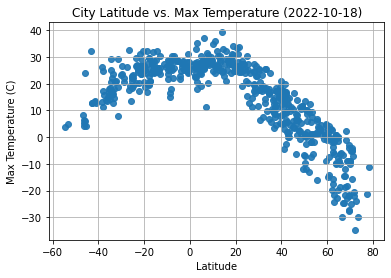

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"], 
            marker="o", 
            c='tab:blue', 
            alpha=0.9)

# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.grid(True)

                  
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

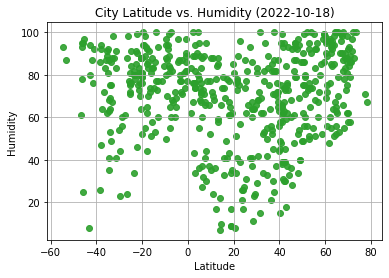

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"], 
            marker="o", 
            c='tab:green', 
            alpha=0.9)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

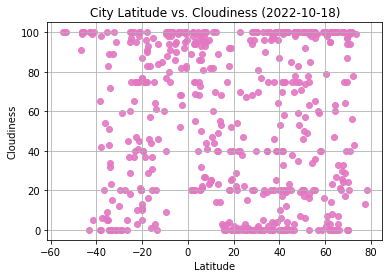

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"], 
            marker="o", 
            c='tab:pink', 
            alpha=0.9)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

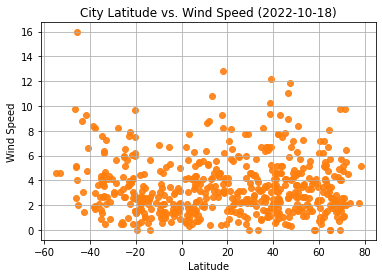

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"], 
            marker="o", 
            c='tab:orange', 
            alpha=0.9)

# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid(True)
# Save the figure

plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,gimli,50.6336,-96.9907,-11.99,56,50,3.60,CA,1679940838
3,dikson,73.5069,80.5464,-29.75,100,99,2.17,RU,1679940838
6,bairiki,1.3292,172.9752,27.00,83,20,4.12,KI,1679940839
7,srednekolymsk,67.4500,153.6833,-24.61,90,30,2.80,RU,1679940839
8,jamestown,42.0970,-79.2353,6.40,95,100,2.57,US,1679940839


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao joao da barra,-21.6403,-41.0511,31.05,75,41,6.01,BR,1679940838
1,ahipara,-35.1667,173.1667,15.94,91,9,0.92,NZ,1679940838
4,cape town,-33.9258,18.4232,22.17,53,32,3.58,ZA,1679940616
5,chuy,-33.6971,-53.4616,23.74,49,0,2.77,UY,1679940838
10,atuona,-9.8000,-139.0333,26.90,80,77,6.87,PF,1679940839


In [24]:
city_data_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7962268522353366


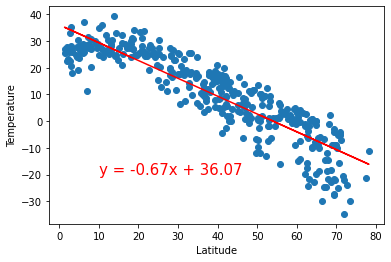

In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = "Temperature"
text_coordinates = (10,-20)

plot_linear_regression(x_values, y_values, title, text_coordinates)


The r-value is: 0.45938553419568323


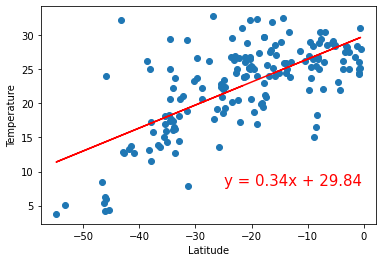

In [27]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = "Temperature"
text_coordinates = (-25,8)

plot_linear_regression(x_values, y_values, title, text_coordinates)


**Discussion about the linear relationship:**  The linear correlation on the nothern Hemsiphere has a good "r" value as its closer to 1 whilst the "r"value on the southern Hemsiphere has an intermediate level correletion due to it not being closer to 0 or 1. The Nothern Hemsiphere shows that as you stray further away from the equator, the more the tempreture increases. The southern Hemisphere does not decrease or increase as you move away from the equator compared to the nothern Hemsiphere

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08882187596212089


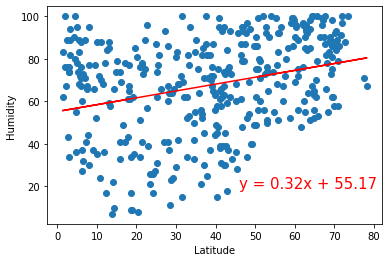

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
title = "Humidity "
text_coordinates = (46,19)

plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-value is: 0.021384016184287136


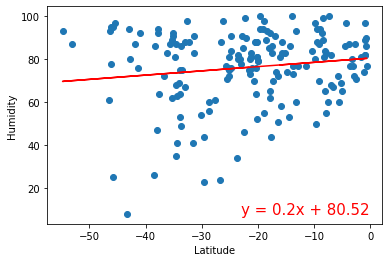

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
title = "Humidity"
text_coordinates = (-23,8)

plot_linear_regression(x_values, y_values, title, text_coordinates)


**Discussion about the linear relationship:** Both the Nothern and southern Hemsipheres have a very weak "r" value.  The Gradient of the slope line for the Nothern Hemsiphere is 0.32, whilst the southern Hemsipheres gradient line is 0.2. There is a  a weak positive correlation between humidity and latitude on the nothern Hemisphere whilst there is very very waek correlation on the southern Hemisphere.






### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0018406095757075266


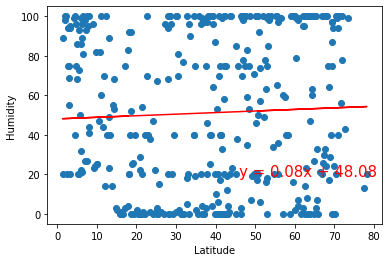

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
title = "Humidity "
text_coordinates = (46,19)

plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-value is: 0.07453604836666115


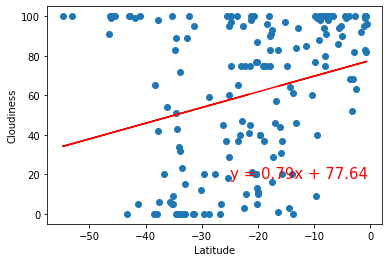

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
title = "Cloudiness"
text_coordinates = (-25,18)

plot_linear_regression(x_values, y_values, title, text_coordinates)

**Discussion about the linear relationship:** The Northern Hemisphere has no correlation between cloudiness and Latitude. The "r" value is also weak. On the southern Hemisphere, the correlation is a little better and so is its "r" value. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.000292353273393353


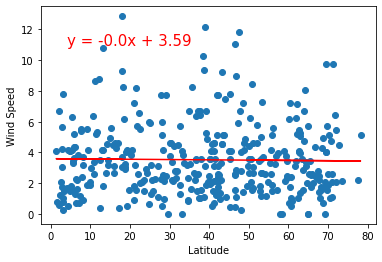

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
title = "Wind Speed"
text_coordinates = (4,11)

plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-value is: 0.13742644620531286


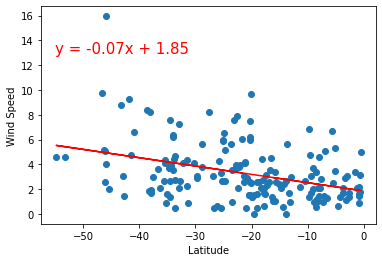

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
title = "Wind Speed"
text_coordinates = (-55,13)

plot_linear_regression(x_values, y_values, title, text_coordinates)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
The nothern Hemsiphere shows to have no correlation wind speed & latitude as the slope is horzontal. 
The Southern Hemisphere, shows better correlation than the nothern as the wind increases at a slow rate the further 
you go away from the eqautor. 